# Homework 2: U.S. Boundary Currents

Name: 

Date: 

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [7]:
# import modules here
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [4]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_EVEL = xr.open_dataset('EVEL_2015_12.nc')
ds_NVEL = xr.open_dataset('NVEL_2015_12.nc')

In [6]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_EVEL['EVEL'])
nvel = np.array(ds_NVEL['NVEL'])

long = np.array(ds_EVEL['longitude'])
lat = np.array(ds_EVEL['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

Text(0, 0.5, 'Latitude')

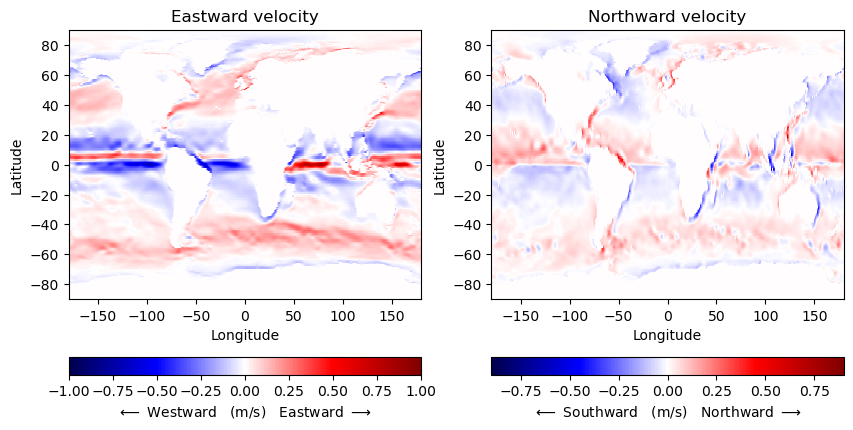

In [90]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(long, lat, evel[0,0,:,:],vmin=-1,vmax=1,cmap='seismic')
plt.colorbar(C, label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$', orientation='horizontal')
plt.title('Eastward velocity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(long, lat, nvel[0,0,:,:],vmin=-0.9,vmax=0.9,cmap='seismic')
plt.colorbar(C, label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$', orientation='horizontal')
plt.title('Northward velocity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east coast of the U.S.? the west coast?
    - 45$^{\circ}$N on the east coast of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
3. Explain how these currents are part of the gyres in the North Atlantic and North Pacific. 

### Answers

Q1. 
   - 30$^{\circ}$N: 
     - East coast: Northwest
     - West coast: Southwest
   - 45$^{\circ}$N:
     - East coast: Northeast
     - West coast: Southeast

Q2. **Answer**: East coast

Q3. **Explanation**:
   - **North Atlantic**:  
     At 30$^{\circ}$N, on the east coast of the U.S., the gyres go northward and westward, while at 45$^{\circ}$N, the gyres go northward and eastward. The currents follow the direction of the gyres, indicating they are part of the North Atlantic gyres.
   - **North Pacific**:  
     At 30$^{\circ}$N, on the west coast of the U.S., the gyres go southward and westward, while at 45$^{\circ}$N, the gyres go southward and eastward. The currents follow the direction of the gyres, indicating they are part of the North Pacific gyres.


### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [60]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_THETA = xr.open_dataset('THETA_2015_12.nc')

In [61]:
# store the THETA grid into a into numpy array
theta = np.array(ds_THETA['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

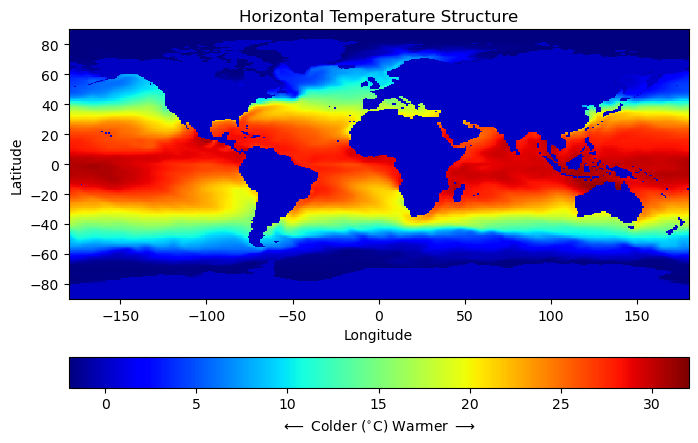

In [94]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))
C = plt.pcolormesh(long,lat, theta[0,0,:,:],vmin=-2,vmax=32,cmap='jet')
plt.title('Horizontal Temperature Structure')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(C, label='$\longleftarrow$ Colder ($^{\circ}$C) Warmer $\longrightarrow$', orientation='horizontal')
# plot the data
# plt.plot()


### Questions:
1. How does the temperature on the west coast of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

### Answer:
1. At the same latitude, the temperature on the west coast is lower than the temperature on the east coast.
2. Due to the Thermohaline Circulation, the current that moves northward carry the heat to the pole. Then the heat will sink and cool down at the pole and moves southward.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [95]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_WVELSTAR = xr.open_dataset('WVELSTAR_2015_12.nc')

In [96]:
# store the WVELSTAR grid into a into numpy array
WVELSTAR = np.array(ds_WVELSTAR['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [104]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
depth = np.array(ds_WVELSTAR['Zl'])
lat = np.array(ds_WVELSTAR['latitude'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

In [207]:
print('Max vertical velocity on latitude 40$^{\circ}$N: ', WVELSTAR[0,:,259,:].max())
print('Min vertical velocity on latitude 40$^{\circ}$N: ', WVELSTAR[0,:,259,:].min())


Max vertical velocity on latitude 40$^{\circ}$N:  2.875943755498156e-05
Min vertical velocity on latitude 40$^{\circ}$N:  -3.2632233342155814e-05


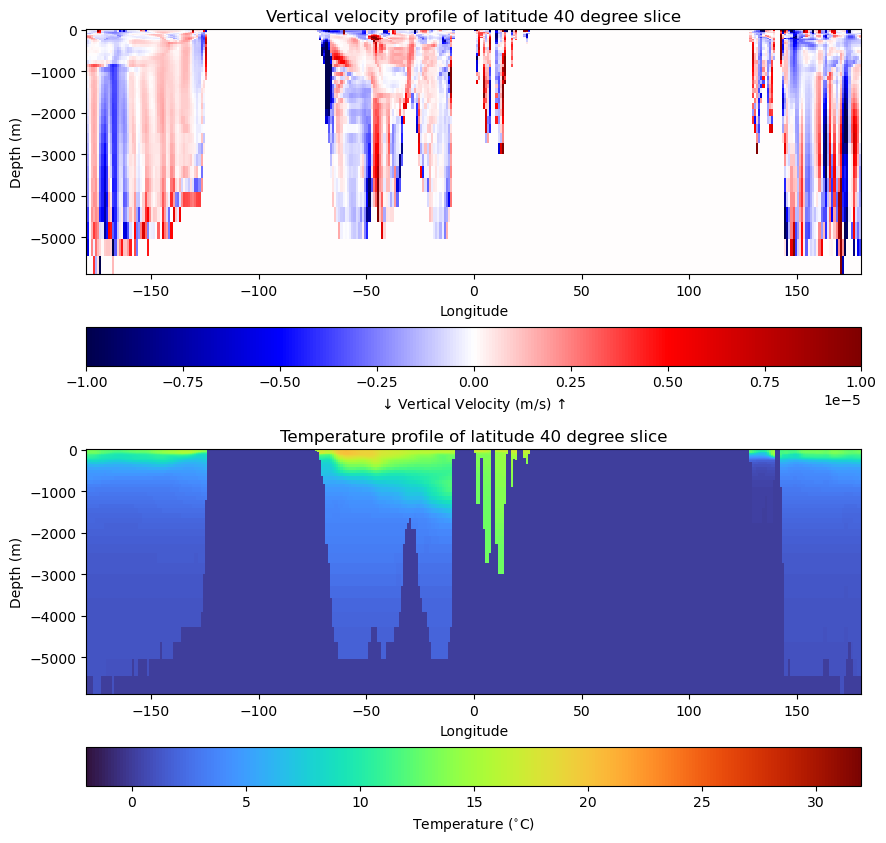

In [234]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
C = plt.pcolormesh(long, depth, WVELSTAR[0,:,259,:],vmin=-0.00001, vmax=0.00001, cmap='seismic')
plt.title("Vertical velocity profile of latitude 40 degree slice")
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.colorbar(C, label='${\u2193}$ Vertical Velocity (m/s) ${\u2191}$', orientation='horizontal')

# plt.subplot(2,1,1)
# C = plt.pcolormesh(long, depth, evel[0,:,259,:],vmin=-1, vmax=1, cmap='seismic')
# plt.title("Vertical velocity profile of latitude 40 degree slice")
# plt.xlabel('Longitude')
# plt.ylabel('Depth (m)')
# plt.colorbar(C, label='${\u2193}$ Vertical Velocity (m/s) ${\u2191}$', orientation='horizontal')

# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(long, depth, theta[0,:,259,:],vmin=-2, vmax=32, cmap='turbo')
plt.title("Temperature profile of latitude 40 degree slice")
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.colorbar(C, label='Temperature ($^{\circ}$C)', orientation='horizontal')

### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

### Answer
1. On the west coast, the vertical velocity of the current goes upward while the east coast's vertical velocity tends to go downward. 
2. The vertical velocity is different from the horizontal velocity. Vertical movement of a current is influenced primarily by density differences and temperature. Horizontal velocity is caused by the Coriolis force and the wind direction.
3. On the west coast, the currents adjacent to the coastline carry cold water from the North to the South. By the upwelling movement of the vertical movement, the cold temperature is brought up to the surface causing the temperature to lower down. 
    
    On the east coast, the vertical currents go downward so it does not affect the temperature of the surface, which is already warm.
4. During spring time, those prevailing winds will carry the cold air from the North travel to the South. This make the surface temperature of the ocean to be low. According to the equation of State, temperature lowering down can cause the density to increase, which leads to slower upward vertical velocity on the west coast and faster downward velocity on the east coast.